In [89]:
import pandas as pd
import requests
import json
import matplotlib.pyplot as plt
import os

api_key = os.environ["OPENWEATHER_API_KEY"]

df = pd.DataFrame()

In [97]:
def call_and_append(df, city):
    # Normalize city for consistent duplicate checks
    city_check = city.strip().lower()

    # If df already has the city, return df unchanged
    if 'city' in df.columns:
        existing_cities = df['city'].dropna().astype(str).str.strip().str.lower()
        if city_check in set(existing_cities):
            return df

    # API call
    params = {"q": city, "appid": api_key, "units": "imperial"}
    url = "https://api.openweathermap.org/data/2.5/forecast"

    response = requests.get(url, params=params, timeout=10)
    response.raise_for_status()
    data = response.json()

    # Build new df from API
    new_df = pd.json_normalize(data["list"], sep="_")

    df_weather = pd.json_normalize(new_df['weather'].str[0]).add_prefix("weather_")
    new_df = new_df.drop(columns=['weather']).join(df_weather)

    new_df['dt_txt'] = pd.to_datetime(new_df['dt_txt'])
    new_df['city'] = city.strip() 

    # Append and return
    return pd.concat([df, new_df], ignore_index=True)

In [132]:
df = call_and_append(df, "Newark")
print(df['city'].unique())

['Chicago' 'New York' 'Dallas' 'Newark']


In [134]:
print(df.head())

           dt  visibility  pop              dt_txt  main_temp  \
0  1771902000     10000.0  0.0 2026-02-24 03:00:00      23.23   
1  1771912800     10000.0  0.0 2026-02-24 06:00:00      22.98   
2  1771923600     10000.0  0.0 2026-02-24 09:00:00      23.52   
3  1771934400     10000.0  0.0 2026-02-24 12:00:00      23.90   
4  1771945200     10000.0  0.0 2026-02-24 15:00:00      27.57   

   main_feels_like  main_temp_min  main_temp_max  main_pressure  \
0            19.11          23.23          24.82           1028   
1            16.12          22.48          22.98           1027   
2            15.10          23.52          23.67           1024   
3            13.93          23.90          23.90           1018   
4            16.12          27.57          27.57           1013   

   main_sea_level  ...  wind_deg  wind_gust  sys_pod  rain_3h  snow_3h  \
0            1028  ...       337       3.67        n      NaN      NaN   
1            1027  ...       220       7.38        n      

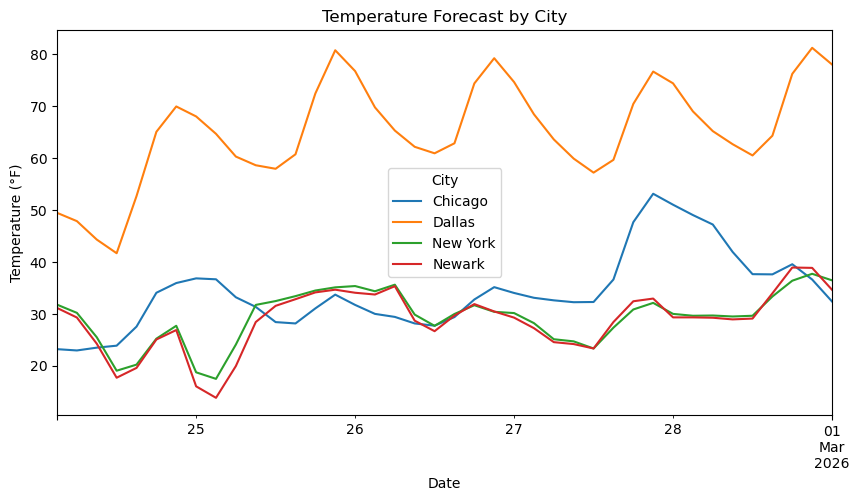

In [136]:
# Plot for various cities
pivot_df = df.pivot(index='dt_txt', columns='city', values='main_temp')

pivot_df.plot(figsize=(10,5))

plt.title("Temperature Forecast by City")
plt.xlabel("Date")
plt.ylabel("Temperature (°F)")
plt.legend(title="City")
plt.show()

In [ ]:
# For use later

# # Dictionary comperhension (USE THIS!) for look to check out what it's in items.
# filtered = {k:v for k, v in data.items() if k != "list"}

# city_data = data["city"]

# print(city_data)